In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customers/Mall_Customers.csv


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read dataset

train_data = pd.read_csv("/kaggle/input/customers/Mall_Customers.csv")

In [5]:
train_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
#view first 5 rows train data
train_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# check number of rows and columns of train data

train_data.shape

(200, 5)

In [8]:
# to get infomation about the  train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# preprocessing

In [9]:
# checking missing values
train_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
# Check for Duplicates and Remove 
train_data.duplicated().sum() 
train_data.drop_duplicates(inplace = True) 

In [11]:
mall_data = train_data.drop(['CustomerID', 'Gender'], axis=1)

In [12]:
mall_data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [13]:
mall_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# Data Visualization

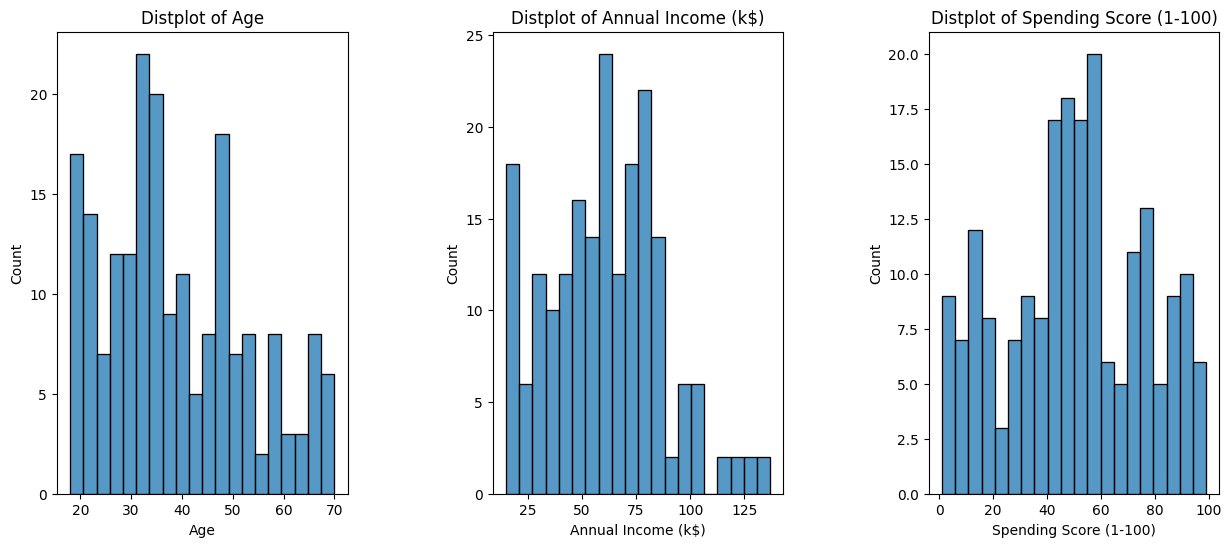

In [14]:
plt.figure(figsize = (15 , 6))
n = 0 
for x in ['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(mall_data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show();

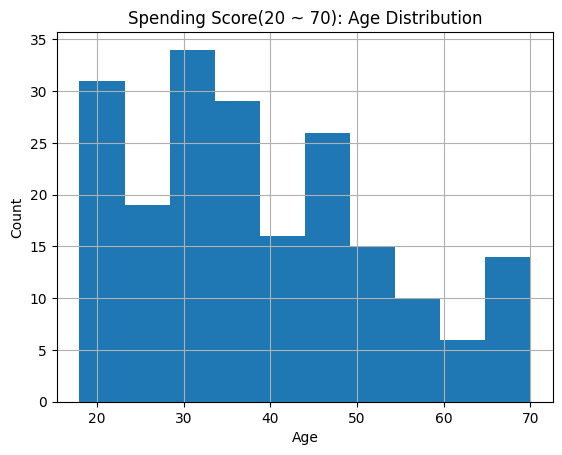

In [15]:
mall_data['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Spending Score(20 ~ 70): Age Distribution');

# Ploting the Relation between Age , Annual Income and Spending Score

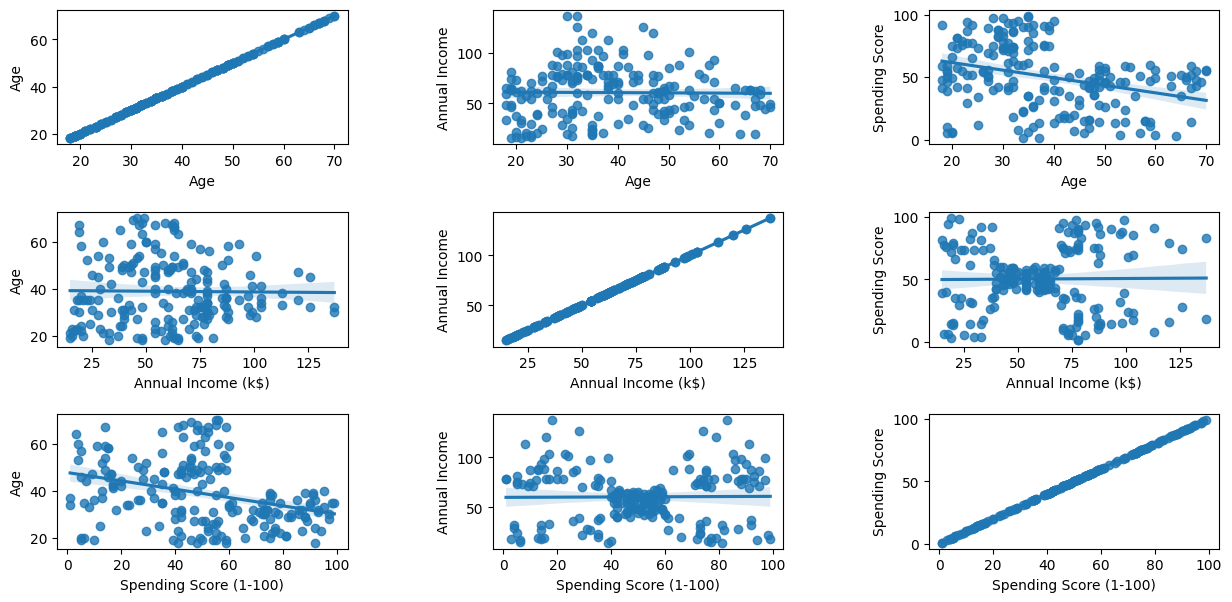

In [16]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = mall_data)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

Text(0.5, 1.0, 'Annual Income (k$) vs. Spending Score (1-100)')

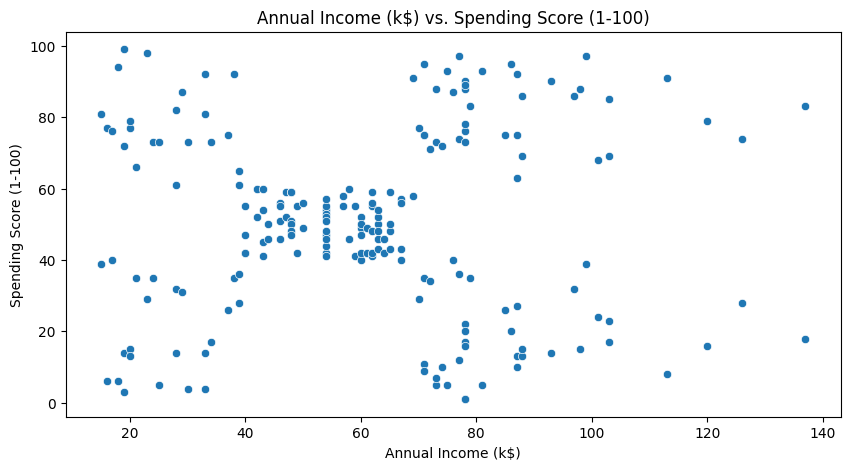

In [17]:
#  Annual Income (k$) vs.Spending Score (1-100)
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=mall_data)
plt.title("Annual Income (k$) vs. Spending Score (1-100)")

Text(0.5, 1.0, 'Age  vs. Spending Score (1-100)')

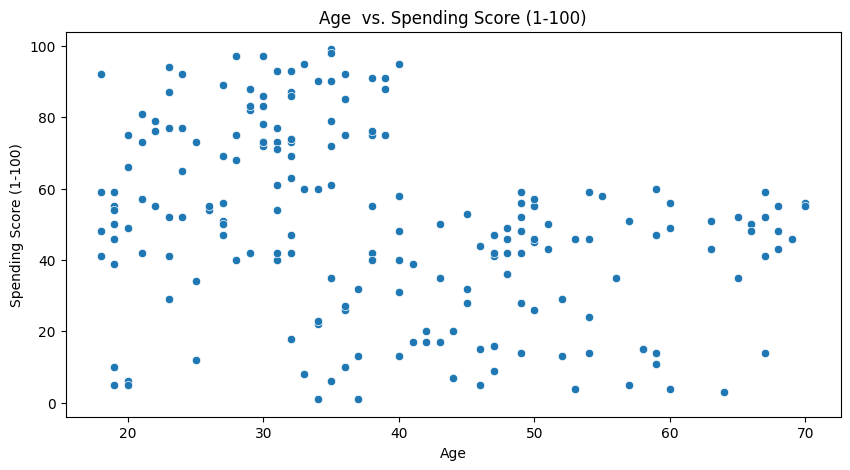

In [18]:
#  Age vs.Spending Score (1-100)
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Age", y="Spending Score (1-100)", data=mall_data)
plt.title("Age  vs. Spending Score (1-100)")

In [19]:
correlation = mall_data.corr()

<Axes: >

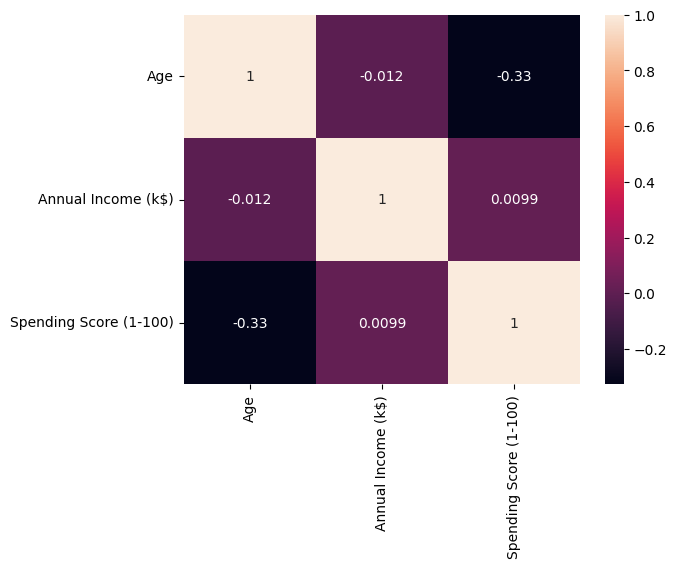

In [20]:
#Heatmap of Correlation
sns.heatmap(correlation,annot=True)

# k-means

In [21]:
X= mall_data.loc[:,["Age",'Spending Score (1-100)']].values

In [22]:

km=[]

#we assume the max number of cluster would be 10
###Static code to get max no of clusters
k_values=range(1,11)
for i in k_values:
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    k_fit=kmeans.fit(X)
    km.append(kmeans.inertia_)

In [23]:
# Centers of Clusters for each feature
k_fit.cluster_centers_

array([[24.79166667, 56.08333333],
       [42.18181818, 21.72727273],
       [64.85      , 49.85      ],
       [31.52      , 91.32      ],
       [26.75      , 40.125     ],
       [47.76923077, 54.69230769],
       [46.7826087 , 41.7826087 ],
       [55.13333333,  9.8       ],
       [27.8       ,  6.4       ],
       [29.125     , 75.34375   ]])

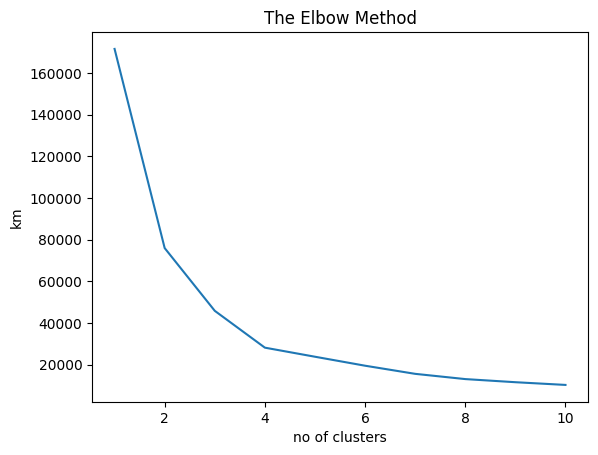

In [24]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), km)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('km')
plt.show()

In [25]:
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
print(y_kmeans)

[2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 2 2 0 1 2 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0
 1 0 1 3 1 3 2 0 2 3 2 2 2 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 3 2 3 2 2 3 3 2 3 3 2 3 3 2 2 3 3 2 3 2 2 2 3 2 3 2 2 3 3 2 3 2 3 3 3 3 3
 2 2 2 2 2 3 3 3 3 2 2 2 1 2 1 3 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 3 1
 0 1 0 1 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


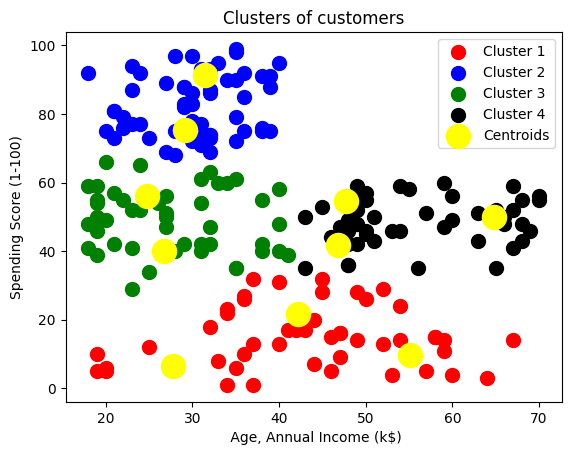

In [26]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel(' Age, Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [27]:
# Evaluate using Silhouette Coefficient
from sklearn import metrics
silhouette_avg = metrics.silhouette_score(X, y_kmeans)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.49973941540141753


In [28]:
from sklearn.metrics import pairwise_distances
# Calculate pairwise distances between data points and cluster centers
distances = pairwise_distances(X, kmeans.cluster_centers_)

# Calculate cluster cohesion as the average distance within each cluster
cohesion = np.mean(np.min(distances, axis=1))
print("Cluster Cohesion:", cohesion)

Cluster Cohesion: 6.5770394375837045


In [29]:
# Calculate entropy
entropy = metrics.cluster.entropy(y_kmeans)
print("Entropy:", entropy)
print("purity=" , 100-entropy)

Entropy: 1.3830865835775379
purity= 98.61691341642246
